In [2]:
!pip install langchain_openai langchain_community langchain_openai -q
!pip install openai -q

In [1]:
import getpass
import os

os.environ["OPENAI_API_KEY"] = getpass.getpass()

from langchain_openai import ChatOpenAI

model = ChatOpenAI(model="gpt-4o-mini-2024-07-18")

··········


# HumanMessage

In [8]:
## HumanMessage
from langchain_core.messages import HumanMessage

model.invoke([HumanMessage(content="Hi! I'm Bob")])

# AIMessage(content='Hi Bob! How can I assist you today?',
# additional_kwargs={'refusal': None}, response_metadata={'token_usage':
# {'completion_tokens': 10, 'prompt_tokens': 11, 'total_tokens': 21},
# 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_5bd87c427a',
# 'finish_reason': 'stop', 'logprobs': None}, id='run-73f27bb1-93b9-47f6-8569-9bffc3f4d69b-0',
# usage_metadata={'input_tokens': 11, 'output_tokens': 10, 'total_tokens': 21})

AIMessage(content='Hi Bob! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 11, 'total_tokens': 21}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_5bd87c427a', 'finish_reason': 'stop', 'logprobs': None}, id='run-73f27bb1-93b9-47f6-8569-9bffc3f4d69b-0', usage_metadata={'input_tokens': 11, 'output_tokens': 10, 'total_tokens': 21})

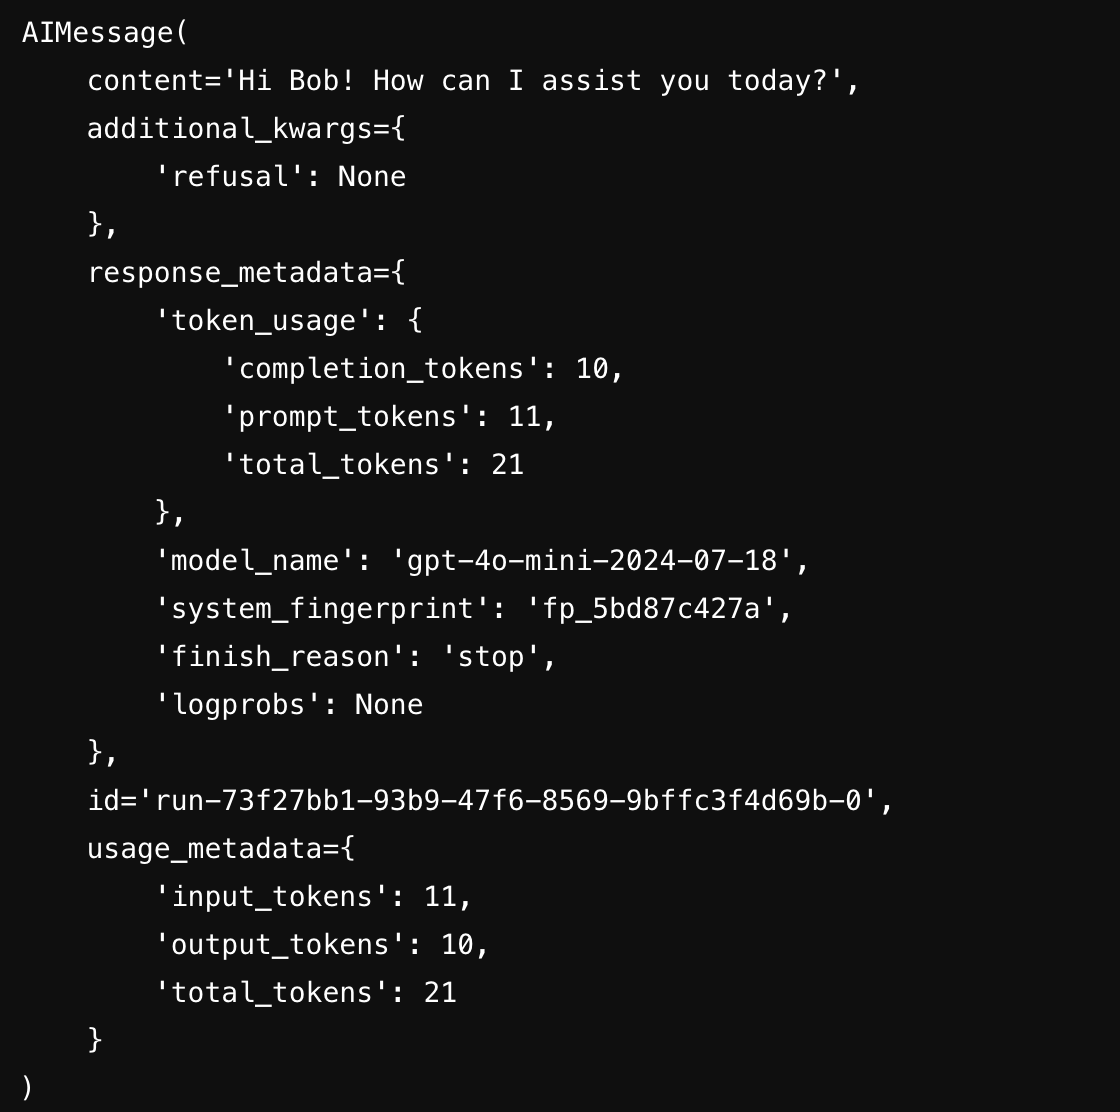

In [12]:
#msg = model.invoke([HumanMessage(content="Hi! I'm Bob")])
msg.content #Hi Bob! How can I assist you today?

msg.pretty_print()

================================== Ai Message ==================================

Hi Bob! How can I assist you today?


In [15]:
msg.pretty_repr(html=True)

'==================================\x1b Ai Message \x1b==================================\n\nHi Bob! How can I assist you today?'

# AIMessage

In [9]:
## AIMessage
## 可以用来加入 AI 的历史信息
from langchain_core.messages import AIMessage

model.invoke(
    [
        HumanMessage(content="Hi! I am Bryce"),
        AIMessage(content="Hello Bryce! How can I assist you today?"),
        HumanMessage(content="What's my name?"),
    ]
)

# AIMessage(content='Your name is Bryce! How can I help you today?',
# additional_kwargs={'refusal': None}, response_metadata={'token_usage':
# {'completion_tokens': 12, 'prompt_tokens': 34, 'total_tokens': 46},
# 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_f33667828e',
# 'finish_reason': 'stop', 'logprobs': None}, id='run-ed6ae692-96e0-4948-813d-9a87ba3eede3-0',
# usage_metadata={'input_tokens': 34, 'output_tokens': 12, 'total_tokens': 46})

AIMessage(content='Your name is Bryce! How can I help you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 34, 'total_tokens': 46}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_f33667828e', 'finish_reason': 'stop', 'logprobs': None}, id='run-ed6ae692-96e0-4948-813d-9a87ba3eede3-0', usage_metadata={'input_tokens': 34, 'output_tokens': 12, 'total_tokens': 46})

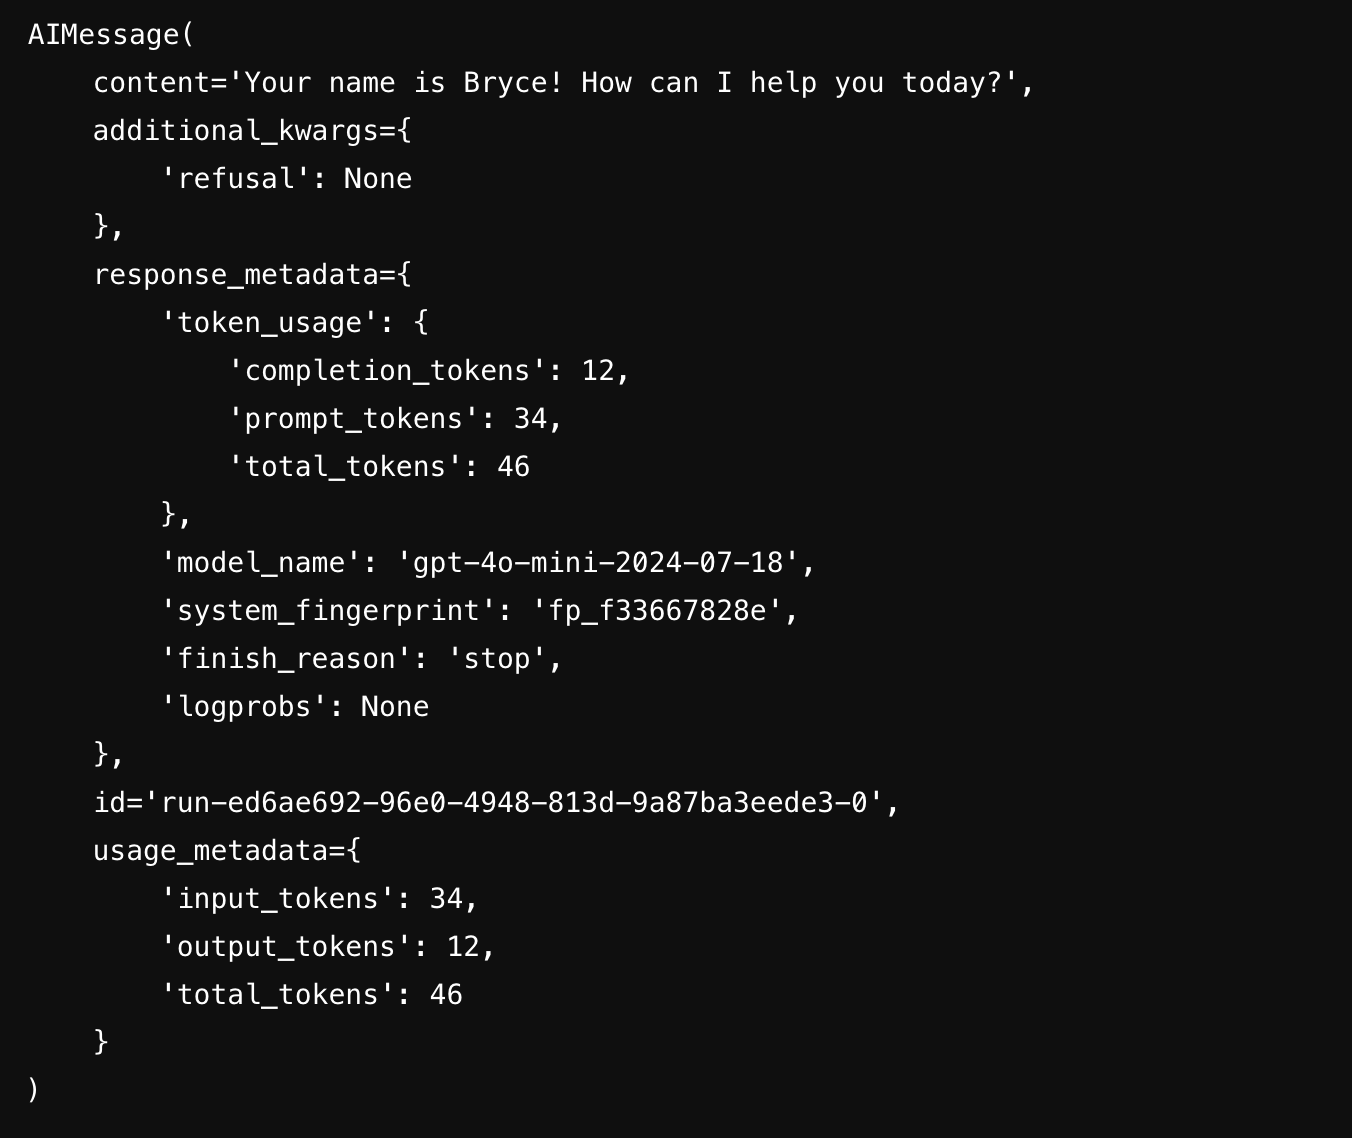

# Message history

In [17]:
from langchain_core.chat_history import (
    BaseChatMessageHistory,
    InMemoryChatMessageHistory,
)
from langchain_core.runnables.history import RunnableWithMessageHistory

store = {}


def get_session_history(session_id: str) -> BaseChatMessageHistory:
    if session_id not in store:
        store[session_id] = InMemoryChatMessageHistory()
    return store[session_id]


with_message_history = RunnableWithMessageHistory(model, get_session_history)

In [18]:
with_message_history

RunnableWithMessageHistory(bound=RunnableBinding(bound=RunnableBinding(bound=RunnableLambda(_enter_history), config={'run_name': 'load_history'})
| RunnableBinding(bound=RunnableLambda(_call_runnable_sync), config={'run_name': 'check_sync_or_async'}), config={'run_name': 'RunnableWithMessageHistory'}), get_session_history=<function get_session_history at 0x7c56c948f2e0>, history_factory_config=[ConfigurableFieldSpec(id='session_id', annotation=<class 'str'>, name='Session ID', description='Unique identifier for a session.', default='', is_shared=True, dependencies=None)])

In [19]:
store

{}

In [20]:
config = {"configurable": {"session_id": "abc2"}}
response = with_message_history.invoke(
    [HumanMessage(content="Hi! I'm Bryce")],
    config=config,
)

response.content

'Hi Bryce! How can I assist you today?'

In [21]:
response = with_message_history.invoke(
    [HumanMessage(content="What's my name?")],
    config=config,
)

response.content

'Your name is Bryce! How can I help you today, Bryce?'

In [22]:
config = {"configurable": {"session_id": "abc3"}}

response = with_message_history.invoke(
    [HumanMessage(content="What's my name?")],
    config=config,
)

response.content

"I'm sorry, but I don't have access to personal information about individuals unless it's shared with me in the course of our conversation. If you'd like to tell me your name, feel free!"

In [23]:
config = {"configurable": {"session_id": "abc2"}}

response = with_message_history.invoke(
    [HumanMessage(content="What's my name?")],
    config=config,
)

response.content

"Your name is Bryce. If there's anything else you'd like to discuss or ask, feel free!"